# CompMech04-Linear Algebra Project
## Practical Linear Algebra for Finite Element Analysis

In this project we will perform a linear-elastic finite element analysis (FEA) on a support structure made of 11 beams that are riveted in 7 locations to create a truss as shown in the image below. 

![Mesh image of truss](../images/mesh.png)

The triangular truss shown above can be modeled using a [direct stiffness method [1]](https://en.wikipedia.org/wiki/Direct_stiffness_method), that is detailed in the [extra-FEA_material](./extra-FEA_material.ipynb) notebook. The end result of converting this structure to a FE model. Is that each joint, labeled $n~1-7$, short for _node 1-7_ can move in the x- and y-directions, but causes a force modeled with Hooke's law. Each beam labeled $el~1-11$, short for _element 1-11_, contributes to the stiffness of the structure. We have 14 equations where the sum of the components of forces = 0, represented by the equation

$\mathbf{F-Ku}=\mathbf{0}$

Where, $\mathbf{F}$ are externally applied forces, $\mathbf{u}$ are x- and y- displacements of nodes, and $\mathbf{K}$ is the stiffness matrix given in `fea_arrays.npz` as `K`, shown below

_note: the array shown is 1000x(`K`). You can use units of MPa (N/mm^2), N, and mm. The array `K` is in 1/mm_

$\mathbf{K}=EA*$

$  \left[ \begin{array}{cccccccccccccc}
 4.2 & 1.4 & -0.8 & -1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 1.4 & 2.5 & -1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -0.8 & -1.4 & 5.0 & 0.0 & -0.8 & 1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -3.3 & 0.0 & -0.8 & 1.4 & 8.3 & 0.0 & -0.8 & -1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 1.4 & -2.5 & 0.0 & 5.0 & -1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & -1.4 & 8.3 & 0.0 & -0.8 & 1.4 & -3.3 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & 1.4 & 8.3 & 0.0 & -0.8 & -1.4 & -3.3 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.4 & -2.5 & 0.0 & 5.0 & -1.4 & -2.5 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & -1.4 & 5.0 & 0.0 & -0.8 & 1.4 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & 1.4 & 4.2 & -1.4 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.4 & -2.5 & -1.4 & 2.5 \\
\end{array}\right]~\frac{1}{m}$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
fea_arrays = np.load('./fea_arrays.npz')
K=fea_arrays['K']
K

array([[ 0.00416667,  0.00144338, -0.00083333, -0.00144338, -0.00333333,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00144338,  0.0025    , -0.00144338, -0.0025    ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00083333, -0.00144338,  0.005     ,  0.        , -0.00083333,
         0.00144338, -0.00333333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00144338, -0.0025    ,  0.        ,  0.005     ,  0.00144338,
        -0.0025    ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00333333,  0.        , -0.00083333,  0.00144338,  0.00833333,
         0.        , -0.00083333, -0.00144338, -0.00333333,  0.        ,
         0.        ,  0.  

In this project we are solving the problem, $\mathbf{F}=\mathbf{Ku}$, where $\mathbf{F}$ is measured in Newtons, $\mathbf{K}$ `=E*A*K` is the stiffness in N/mm, `E` is Young's modulus measured in MPa (N/mm^2), and `A` is the cross-sectional area of the beam measured in mm^2. 

There are three constraints on the motion of the joints:

i. node 1 displacement in the x-direction is 0 = `u[0]`

ii. node 1 displacement in the y-direction is 0 = `u[1]`

iii. node 7 displacement in the y-direction is 0 = `u[13]`

We can satisfy these constraints by leaving out the first, second, and last rows and columns from our linear algebra description.

### 1. Calculate the condition of `K` and the condition of `K[2:13,2:13]`. 

a. What error would you expect when you solve for `u` in `K*u = F`? 

b. Why is the condition of `K` so large? __The problem is underconstrained. It describes stiffness of structure, but not the BC's. So, we end up with sumF=0 and -sumF=0__

c. What error would you expect when you solve for `u[2:13]` in `K[2:13,2:13]*u=F[2:13]`

In [22]:
print(np.linalg.cond(K))
print(np.linalg.cond(K[2:13,2:13]))

print('expected error in x=solve(K,b) is {}'.format(10**(16-16)))
print('expected error in x=solve(K[2:13,2:13],b) is {}'.format(10**(2-16)))

3.4670354762146124e+16
52.23542514351002
expected error in x=solve(K,b) is 1
expected error in x=solve(K[2:13,2:13],b) is 1e-14


### 2. Apply a 100-N downward force to the central top node (n 4)

a. Create the LU matrix for K[2:13,2:13]

b. Use cross-sectional area of $0.1~mm^2$ and steel and almuminum moduli, $E=200~GPa~and~E=70~GPa,$ respectively. Solve the forward and backward substitution methods for 

* $\mathbf{Ly}=\mathbf{F}\frac{1}{EA}$

* $\mathbf{Uu}=\mathbf{y}$

_your array `F` is zeros, except for `F[5]=-100`, to create a -100 N load at node 4._

c. Plug in the values for $\mathbf{u}$ into the full equation, $\mathbf{Ku}=\mathbf{F}$, to solve for the reaction forces

d. Create a plot of the undeformed and deformed structure with the displacements and forces plotted as vectors (via `quiver`). Your result for aluminum should match the following result from [extra-FEA_material](./extra-FEA_material.ipynb). _note: The scale factor is applied to displacements $\mathbf{u}$, not forces._

![Deformed structure with loads applied](../images/deformed_truss.png)

In [23]:
E=200e3
A=0.1
Ff=np.zeros(11)
Ff[5]=-100
print(Ff)
# step 1 solve for uf (the joints without constraints)
uf = np.linalg.solve(E*A*K[2:13,2:13],Ff)
u=np.zeros(14)
u[2:13]=uf

# step 2 solve for F (the solution should include reactions and applied forces)
F=E*A*K@u
print(F[2:13])

[   0.    0.    0.    0.    0. -100.    0.    0.    0.    0.    0.]
[ 1.42108547e-14  0.00000000e+00 -2.84217094e-14  0.00000000e+00
  7.10542736e-15 -1.00000000e+02  2.84217094e-14  1.13686838e-13
 -7.10542736e-15  0.00000000e+00  0.00000000e+00]


In [24]:
xy={0:'x',1:'y'}
print('displacements:\n----------------')
for i in range(len(u)):
    print('u_{}{}:{:.2f} mm'.format(int(i/2)+1,xy[i%2],u[i]))
print('\nforces:\n----------------')
for i in range(len(F)):
    print('F_{}{}:{:.2f} N'.format(int(i/2)+1,xy[i%2],F[i]))

displacements:
----------------
u_1x:0.00 mm
u_1y:0.00 mm
u_2x:1.95 mm
u_2y:-2.12 mm
u_3x:0.43 mm
u_3y:-4.00 mm
u_4x:1.08 mm
u_4y:-5.37 mm
u_5x:1.73 mm
u_5y:-4.00 mm
u_6x:0.22 mm
u_6y:-2.12 mm
u_7x:2.17 mm
u_7y:0.00 mm

forces:
----------------
F_1x:-0.00 N
F_1y:50.00 N
F_2x:0.00 N
F_2y:0.00 N
F_3x:-0.00 N
F_3y:0.00 N
F_4x:0.00 N
F_4y:-100.00 N
F_5x:0.00 N
F_5y:0.00 N
F_6x:-0.00 N
F_6y:0.00 N
F_7x:0.00 N
F_7y:50.00 N


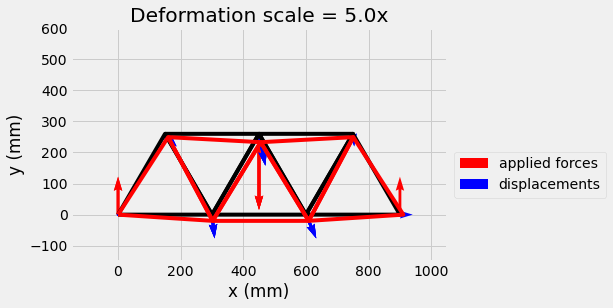

In [25]:
ix = 2*np.block([[np.arange(0,5)],[np.arange(1,6)],[np.arange(2,7)],[np.arange(0,5)]])
iy = ix+1
nodes = np.array([[1,0,0],[2,0.5,3**0.5/2],[3,1,0],[4,1.5,3**0.5/2],[5,2,0],[6,2.5,3**0.5/2],[7,3,0]])
nodes[:,1:3]*=300
elems = np.array([[1,1,2],[2,2,3],[3,1,3],[4,2,4],[5,3,4],[6,3,5],[7,4,5],[8,4,6],[9,5,6],[10,5,7],[11,6,7]])
r = np.block([n[1:3] for n in nodes])

s=5
l=300
plt.plot(r[ix],r[iy],'-',color=(0,0,0,1))
plt.plot(r[ix]+u[ix]*s,r[iy]+u[iy]*s,'-',color=(1,0,0,1))
#plt.quiver(r[ix],r[iy],u[ix],u[iy],color=(0,0,1,1),label='displacements')
plt.quiver(r[ix],r[iy],F[ix],F[iy],color=(1,0,0,1),label='applied forces')
plt.quiver(r[ix],r[iy],u[ix],u[iy],color=(0,0,1,1),label='displacements')
plt.axis(l*np.array([-0.5,3.5,-0.5,2]))
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Deformation scale = {:.1f}x'.format(s))
plt.legend(bbox_to_anchor=(1,0.5))

### 3. Determine cross-sectional area

a. Using aluminum, what is the minimum cross-sectional area to keep total y-deflections $<0.2~mm$?

b. Using steel, what is the minimum cross-sectional area to keep total y-deflections $<0.2~mm$?

c. What are the weights of the aluminum and steel trusses with the chosed cross-sectional areas?

In [8]:
rhoSteel = 8000/1000**3 #kg/m^3*1m^3/(1000**3mm**3) [kg/mm^3]
rhoAl = 2700/1000**3 #kg/m^3*1m^3/(1000**3mm**3) [kg/mm^3]

__Solve the problem with given E for Steel and Aluminum (I used 200 GPa and 70 GPa, respectively). Then, total price is the volume x density x price/tonne/1000, here I used 8000 and 2700 kg/m^3, respectively.__

Its a linear solution, so once you have one answer e.g. max deflection is 10 mm, you can multiply the Area by the actual/desired

In [9]:
E=200e3
A=0.1
Ff=np.zeros(11)
Ff[5]=-100
print(Ff)
# step 1 solve for uf (the joints without constraints)
uf = np.linalg.solve(E*A*K[2:13,2:13],Ff)
u=np.zeros(14)
u[2:13]=uf


np.abs(u).max()/0.2

[   0.    0.    0.    0.    0. -100.    0.    0.    0.    0.    0.]


26.87499999999999

with A=0.1, its 27x off, so multiply area be 27.

In [10]:
E=200e3
A=0.1*26.875 # new cross-section
Ff=np.zeros(11)
Ff[5]=-100

# step 1 solve for uf (the joints without constraints)
uf = np.linalg.solve(E*A*K[2:13,2:13],Ff)
u=np.zeros(14)
u[2:13]=uf


print('(max deflection)/(0.2mm)=',np.abs(u).max()/0.2)
print('A=',A,'mm^2')
print('total volume =',A*300*7,'mm^3')
print('total price =${:.04f}/truss'.format(A*300*7*rhoSteel*476e-3))

(max deflection)/(0.2mm)= 0.999999999999999
A= 2.6875 mm^2
total volume = 5643.75 mm^3
total price =$0.0215/truss


In [11]:
E=70e3
A=0.1 # new cross-section
Ff=np.zeros(11)
Ff[5]=-100
# step 1 solve for uf (the joints without constraints)
uf = np.linalg.solve(E*A*K[2:13,2:13],Ff)
u=np.zeros(14)
u[2:13]=uf

print(np.abs(u).max()/0.2)

76.78571428571423


with A=0.1, its 77x off, so multiply area by 77.

In [12]:
E=70e3
A=0.1*76.7857 # new cross-section
Ff=np.zeros(11)
Ff[5]=-100
# step 1 solve for uf (the joints without constraints)
uf = np.linalg.solve(E*A*K[2:13,2:13],Ff)
u=np.zeros(14)
u[2:13]=uf


print('(max deflection)/(0.2mm)=',np.abs(u).max()/0.2)
print('A=',A,'mm^2')
print('total volume =',A*300*7,'mm^3')
print('total price =${:.4f}/truss'.format(A*300*7*rhoAl*476e-3))

(max deflection)/(0.2mm)= 1.0000001860465462
A= 7.678570000000001 mm^2
total volume = 16124.997000000003 mm^3
total price =$0.0207/truss


__Choose Aluminum based upon current prices and total volume needed.__ (this is subject to variation in the choice of density and modulus)

### 4. Future Predictions using past data

The data from the price of aluminum and steel are in the data files `../data/al_prices.csv` and `../data/steel_price.csv`. If you're going to produce these supports for 5 years, how would you use the price history of steel and aluminum to compare how much manufacturing will cost?

a. Separate the aluminum and steel data points into training and testing data (70-30%-split)

b. Fit the training data to polynomial functions of order n. _Choose the highest order._

c. Plot the error between your model and the training data and the error between your model and you testing data as a function of the polynomial function order, n. [Create the training-testing curves](../notebooks/03_Linear-regression-algebra.ipynb)

d. Choose a polynomial function to predict the price of aluminum and steel in the year 2025. 

e. Based upon your price model would you change your answer in __3.b__?

In [13]:
steel=np.loadtxt('../data/steel_price.csv',skiprows=1,delimiter=',')
al = np.loadtxt('../data/al_price.csv',skiprows=1,delimiter=',')
al = np.block([[(al[:,0]-al[:,0].min())/(al[:,0].max()-al[:,0].min())],[al[:,1]],[al[:,0]]]).T
steel = np.block([[(steel[:,0]-steel[:,0].min())/(steel[:,0].max()-steel[:,0].min())],[steel[:,1]],[steel[:,0]]]).T

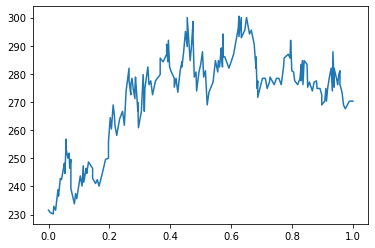

In [14]:
plt.plot(steel[:,0],steel[:,1])
#plt.plot(al[:,0],al[:,1])

In [15]:
al[[0,2,10,20]]

array([[0.00000000e+00, 1.12289157e+03, 2.01600016e+03],
       [5.31251313e-03, 7.56626506e+02, 2.01602227e+03],
       [5.17161723e-02, 1.08433735e+03, 2.01621539e+03],
       [9.21605745e-02, 1.23855422e+03, 2.01638372e+03]])

In [16]:
# randomize testing/training indices
import random
np.random.seed(103)

i_rand=random.sample(range(0,len(al)),len(al))
# choose the first half of data as training
train_per=0.7
al_train=al[np.sort(i_rand[:int(len(al)*train_per)])]
# choose the second half of data as testing
al_test=al[np.sort(i_rand[int(len(al)*train_per):])]

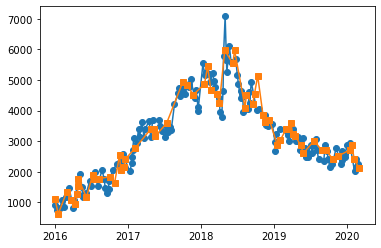

In [17]:
plt.plot(al_train[:,2],al_train[:,1],'o-')
plt.plot(al_test[:,2],al_test[:,1],'s-')

---- n=5 -------
the coefficient of determination for this fit is 0.657
the correlation coefficient this fit is 0.811
---- n=10 -------
the coefficient of determination for this fit is 0.692
the correlation coefficient this fit is 0.832
---- n=15 -------
the coefficient of determination for this fit is 0.701
the correlation coefficient this fit is 0.837
---- n=20 -------
the coefficient of determination for this fit is 0.701
the correlation coefficient this fit is 0.837
---- n=25 -------
the coefficient of determination for this fit is 0.701
the correlation coefficient this fit is 0.837
---- n=30 -------
the coefficient of determination for this fit is 0.702
the correlation coefficient this fit is 0.838
---- n=35 -------
the coefficient of determination for this fit is 0.704
the correlation coefficient this fit is 0.839


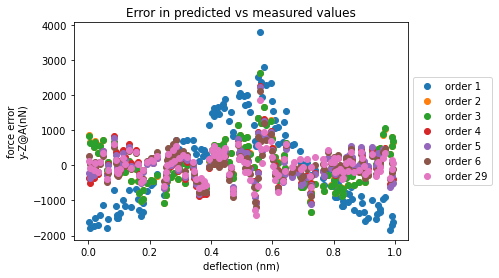

In [18]:
Z=np.block([[al_train[:,0]**0]]).T
Z_test=np.block([[al_test[:,0]**0]]).T
#np.append(Z,np.array([d**2]),axis=0)
max_N=40
SSE_train=np.zeros(max_N)
SSE_test=np.zeros(max_N)
for i in range(1,max_N):
    Z=np.hstack((Z,al_train[:,0].reshape(-1,1)**i))
    Z_test=np.hstack((Z_test,al_test[:,0].reshape(-1,1)**i))
    A = np.linalg.solve(Z.T@Z,Z.T@al_train[:,1])
    St=np.std(al_train[:,1])
    Sr=np.std(al_train[:,1]-Z@A)
    r2=1-Sr/St
    if (i)%5==0:
        print('---- n={:d} -------'.format(i))
        print('the coefficient of determination for this fit is {:.3f}'.format(r2))
        print('the correlation coefficient this fit is {:.3f}'.format(r2**0.5))
    if (i) <=6 or i==29: plt.plot(al_train[:,0],al_train[:,1]-Z@A,'o',label='order {:d}'.format(i))
    SSE_train[i]=np.sum((al_train[:,1]-Z@A)**2)/len(al_train)
    SSE_test[i]=np.sum((al_test[:,1]-Z_test@A)**2)/len(al_test)
    
#plt.plot(d,F)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('Error in predicted vs measured values')
plt.xlabel('deflection (nm)')
plt.ylabel('force error\ny-Z@A(nN)');

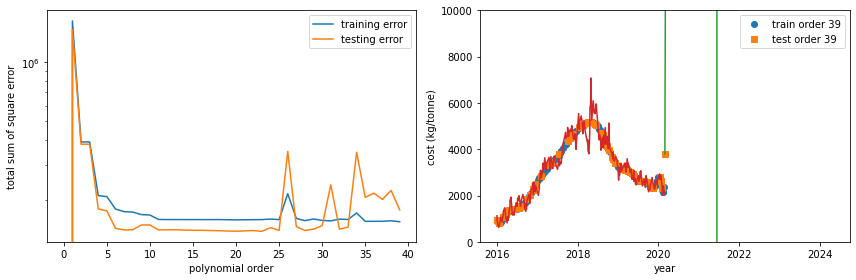

In [19]:
f, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4),tight_layout=True)
ax1.semilogy(np.arange(0,max_N),SSE_train,label='training error')
ax1.semilogy(np.arange(0,max_N),SSE_test,label='testing error')
ax1.legend();
ax1.set_xlabel('polynomial order')
ax1.set_ylabel('total sum of square error');
ax2.plot(al_train[:,2],Z@A,'o',label='train order {:d}'.format(i))
ax2.plot(al_test[:,2],Z_test@A,'s',label='test order {:d}'.format(i))
Z_extrap=np.array([np.linspace(1,2)**i for i in range(0,max_N)]).T
ax2.plot(np.linspace(1,2)*(al[:,2].max()-al[:,2].min())+al[:,2].min(),Z_extrap@A)
ax2.plot(al[:,2],al[:,1])
ax2.set_ylim((0,10000))
ax2.legend();
ax2.set_ylabel('cost (kg/tonne)')
ax2.set_xlabel('year');

__Result is that we can get a polynomial that is very good at interpolating known values, but very poor at extrapolating. Its not work changing the choise from before based upon these projections unless we use a piecewise linear fit. Even then, 5 years is a long time to project__

# References

1. <https://en.wikipedia.org/wiki/Direct_stiffness_method>

2. Aluminum and steel price history on <https://tradingeconomics.com>